# Геннадий Балан

# Домашняя работа по Алгоритмам анализа данных № 8

# Тема: Снижение размерности данных

##### Задача 1
Обучить любую модель классификации на датасете IRIS до применения самописного PCA (2 компоненты) и после него. Сравнить качество классификации по отложенной выборке.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets


In [2]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

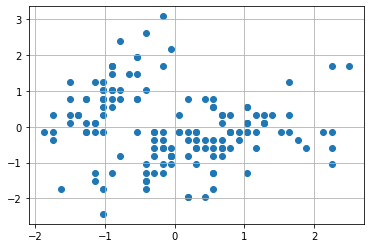

In [3]:
def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res


X = standard_scale(X)
plt.scatter(X[:, 0], X[:, 1])
plt.grid()

In [4]:
# Для начала отмасштабируем выборку
X = X.astype(float)

X = standard_scale(X)

In [6]:
X[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

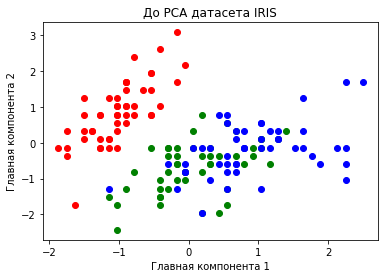

In [28]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('До PCA датасета IRIS')
plt.show()

In [ ]:
Вывод: при 4 признаках отчётливо выделяется один кластер,а два остальных выделить невозможно

In [ ]:
Используем понижение размерности при помощи метода главных компонент

In [12]:
# Найдем собственные векторы и собственные значения
 
covariance_matrix = X.T @ X

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения и собственные векторы в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения и собственные векторы в порядке убывания:
(437.7746724797988, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
(137.10457072021057, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(22.013531335697163, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))
(3.1072254642929815, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


In [ ]:
Оценим долю дисперсии, которая описывается найденными компонентами.

In [13]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперь оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[72.96244541329986, 22.850761786701778, 3.6689218892828634, 0.5178709107154973]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]


In [ ]:
Можно оставить первые два признака,они в сумме дают 96% процентов информации,остальные отборсить

In [14]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(2)])

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [15]:
# Сформируем новую матрицу "объекты-признаки"
Z = X.dot(W)

In [16]:
Z[:10]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356]])

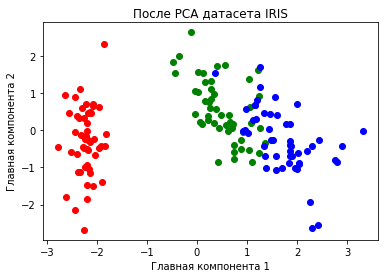

In [29]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y == i, 0], Z[y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('После PCA датасета IRIS')
plt.show()

In [ ]:
Вывод: при использовании метода главных компонент отчётливо стали выделяться три кластера по двум признакам

##### Задача 2
Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()

In [5]:
X[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [6]:
# Используем функцию SVD  
np.linalg.svd(X)

(array([[-1.08239531e-01, -4.09957970e-02,  2.72186462e-02, ...,
          5.43380310e-02,  1.96438400e-03,  2.46978090e-03],
        [-9.94577561e-02,  5.75731483e-02,  5.00034005e-02, ...,
          5.12936114e-03,  8.48544595e-02,  5.83496936e-03],
        [-1.12996303e-01,  2.92000319e-02, -9.42089147e-03, ...,
          2.75184277e-02,  1.78604309e-01,  1.49419118e-01],
        ...,
        [ 7.27030413e-02, -2.29793601e-02, -3.84023516e-02, ...,
          9.89532683e-01, -1.25488246e-02, -7.17729676e-04],
        [ 6.56112167e-02, -8.63643414e-02, -1.98939364e-01, ...,
         -1.41206665e-02,  9.52049996e-01, -2.32048811e-02],
        [ 4.59137323e-02,  2.07800179e-03, -1.12588405e-01, ...,
         -8.30595907e-04, -2.19201906e-02,  9.77300244e-01]]),
 array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239]),
 array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
        [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
        [ 0.71956635, -0.24438178, -0.14212

In [ ]:
Первая матрица-ортогональная матрица корелляции X @ X.T, вторая матрица-диагональная с четырьмя  компонентами-
 собственными значениями матрицы X,они же сингулярные числа матрицы Х.Причём они уже отсортированы автоматически по убыванию
Третья матрица--ортогональная транспонированная матрица ковариации (X.T @ X).T




In [7]:
U, D, Vt = np.linalg.svd(X)

In [8]:
U

array([[-1.08239531e-01, -4.09957970e-02,  2.72186462e-02, ...,
         5.43380310e-02,  1.96438400e-03,  2.46978090e-03],
       [-9.94577561e-02,  5.75731483e-02,  5.00034005e-02, ...,
         5.12936114e-03,  8.48544595e-02,  5.83496936e-03],
       [-1.12996303e-01,  2.92000319e-02, -9.42089147e-03, ...,
         2.75184277e-02,  1.78604309e-01,  1.49419118e-01],
       ...,
       [ 7.27030413e-02, -2.29793601e-02, -3.84023516e-02, ...,
         9.89532683e-01, -1.25488246e-02, -7.17729676e-04],
       [ 6.56112167e-02, -8.63643414e-02, -1.98939364e-01, ...,
        -1.41206665e-02,  9.52049996e-01, -2.32048811e-02],
       [ 4.59137323e-02,  2.07800179e-03, -1.12588405e-01, ...,
        -8.30595907e-04, -2.19201906e-02,  9.77300244e-01]])

In [9]:
D

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [10]:
Vt

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274],
       [ 0.26128628, -0.12350962, -0.80144925,  0.52359713]])

In [11]:
np.dot(U, U.T) # мы видим,что на главной диагонали единицы,а остальные ячейки--нули

array([[ 1.00000000e+00,  1.23155202e-16,  2.88939879e-17, ...,
        -1.55559718e-17,  1.94614290e-17,  9.54097912e-18],
       [ 1.23155202e-16,  1.00000000e+00, -8.38088279e-17, ...,
        -2.80198499e-18, -3.67544536e-17,  8.67361738e-18],
       [ 2.88939879e-17, -8.38088279e-17,  1.00000000e+00, ...,
         1.50975153e-17,  5.68121938e-17,  5.55111512e-17],
       ...,
       [-1.55559718e-17, -2.80198499e-18,  1.50975153e-17, ...,
         1.00000000e+00, -1.49077799e-18, -1.73472348e-18],
       [ 1.94614290e-17, -3.67544536e-17,  5.68121938e-17, ...,
        -1.49077799e-18,  1.00000000e+00, -2.08166817e-17],
       [ 9.54097912e-18,  8.67361738e-18,  5.55111512e-17, ...,
        -1.73472348e-18, -2.08166817e-17,  1.00000000e+00]])

In [12]:
np.dot(Vt, Vt.T) # аналогичная картина наблюдается тут

array([[ 1.00000000e+00,  3.88578059e-16, -1.66533454e-16,
        -1.11022302e-16],
       [ 3.88578059e-16,  1.00000000e+00,  5.55111512e-17,
         1.94289029e-16],
       [-1.66533454e-16,  5.55111512e-17,  1.00000000e+00,
        -5.55111512e-17],
       [-1.11022302e-16,  1.94289029e-16, -5.55111512e-17,
         1.00000000e+00]])

In [ ]:
Контроль выполнен

In [13]:
D_sum = sum(D)
var_exp = [(i / D_sum) * 100 for i in sorted(D, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперь оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[53.529717882362405, 29.956812784020098, 12.003682417209479, 4.509786916408033]
Кумулятивная доля дисперсии по компонентам 
[ 53.52971788  83.48653067  95.49021308 100.        ]


In [27]:
# Сформируем вектор весов из cингулярных чисел, соответствующих первым двум главным компонентам
sing_pairs = [(np.abs(D[i])) for i in range(len(D))]


#print(f'Матрица весов W:\n', W)

In [29]:
W = sing_pairs

In [30]:
W

[20.923065561236474, 11.70916609841243, 4.6918579833257175, 1.7627323858977804]

In [31]:
print(f'Матрица весов W:\n', W)

Матрица весов W:
 [20.923065561236474, 11.70916609841243, 4.6918579833257175, 1.7627323858977804]


In [32]:
Z = X.dot(W)

In [34]:
Z[: 10]

array([-15.52024875, -34.0677162 , -34.01397159, -38.71124079,
       -15.36003988,   4.13109386, -30.6596451 , -20.48419109,
       -49.43914486, -31.33766321])